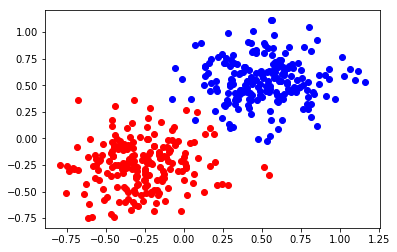

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as mplt
from scipy import linalg
from scipy import io



### Ordinary Least Squares
### SOLVES 2-CLASS LEAST SQUARES PROBLEM

### LOAD DATA ###
### IF LoadClasses IS True, THEN LOAD DATA FROM FILES ###
### OTHERSIE, RANDOMLY GENERATE DATA ###
LoadClasses    = True
TrainOutliers  = False
TestOutliers   = False
NOut           = 20
NSampsClass    = 200
NSamps         = 2*NSampsClass

if LoadClasses:
    
    ### GET FILENAMES %%%
    ### THESE ARE THE OPTIONS ###
    ### LinSepC1, LinSepC2,LinSepC2Outlier (Still Linearly Separable) ###
    ### NonLinSepC1, NonLinSepC2, NonLinSepC22 ###
    
    InFile1          = 'NonLinSepC1.mat'
    InFile2          = 'NonLinSepC2.mat'
    C1Dict           = io.loadmat(InFile1)
    C2Dict           = io.loadmat(InFile2)
    C1               = C1Dict['NonLinSepC1']
    C2               = C2Dict['NonLinSepC2']
    
    if TrainOutliers:
        ### Let's Make Some Noise ###
        Out1        = 2*np.random.rand(NOut,2)-0.5
        Out2        = 2*np.random.rand(NOut,2)-0.5
        C1          = np.concatenate((C1,Out1),axis=0)
        C2          = np.concatenate((C2,Out2),axis=0)
        NSampsClass = NSampsClass+NOut
        NSamps      = 2*NSampsClass
else:
    ### Randomly Generate Some Data
    ### Make a covariance using a diagonal array and rotation matrix
    pi      = 3.141592653589793
    Lambda1 = 0.25
    Lambda2 = 0.05
    DiagMat = np.array([[Lambda1, 0.0],[0.0, Lambda2]])
    RotMat  = np.array([[np.sin(pi/4), np.cos(pi/4)], [-np.cos(pi/4), np.sin(pi/4)]])
    mu1     = np.array([0,0])
    mu2     = np.array([1,1])
    Sigma   = np.dot(np.dot(RotMat.T, DiagMat), RotMat)
    C1      = np.random.multivariate_normal(mu1, Sigma, NSampsClass)
    C2      = np.random.multivariate_normal(mu2, Sigma, NSampsClass)
    print(Sigma)
    print(C1.shape)
    print(C2.shape)

### PLOT DATA ###
matplotlib.pyplot.figure(1)
matplotlib.pyplot.plot(C1[:NSampsClass, 0], C1[:NSampsClass, 1], 'bo')
matplotlib.pyplot.plot(C2[:NSampsClass, 0], C2[:NSampsClass, 1], 'ro')
matplotlib.pyplot.show()

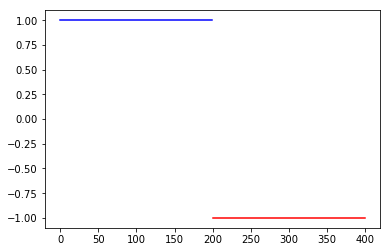

In [5]:
### SET UP TARGET OUTPUTS ###
TargetOutputs          = np.ones((NSamps,1))
TargetOutputs[NSampsClass:NSamps] = -TargetOutputs[NSampsClass:NSamps]

### PLOT TARGET OUTPUTS ###
matplotlib.pyplot.figure(2)
matplotlib.pyplot.plot(range(NSampsClass),         TargetOutputs[range(NSampsClass)],   'b-')
matplotlib.pyplot.plot(range(NSampsClass, NSamps), TargetOutputs[range(NSampsClass, NSamps)], 'r-')
matplotlib.pyplot.show()

In [6]:
### FIND LEAST SQUARES SOLUTION ###
AllSamps     = np.concatenate((C1,C2),axis=0)
AllSampsBias = np.concatenate((AllSamps, np.ones((NSamps,1))), axis=1)
Pseudo       = linalg.pinv2(AllSampsBias)
w            = Pseudo.dot(TargetOutputs)

In [7]:
w

array([[ 1.00766843],
       [ 1.16641088],
       [-0.29237104]])

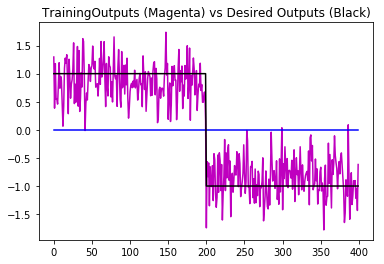

In [8]:
### COMPUTE OUTPUTS ON TRAINING DATA ###
y = AllSampsBias.dot(w)

### PLOT OUTPUTS FROM TRAINING DATA ###
matplotlib.pyplot.figure(3)
matplotlib.pyplot.plot(range(NSamps), y, 'm')
matplotlib.pyplot.plot(range(NSamps),np.zeros((NSamps,1)), 'b')
matplotlib.pyplot.plot(range(NSamps), TargetOutputs, 'k')
matplotlib.pyplot.title('TrainingOutputs (Magenta) vs Desired Outputs (Black)')
matplotlib.pyplot.show()

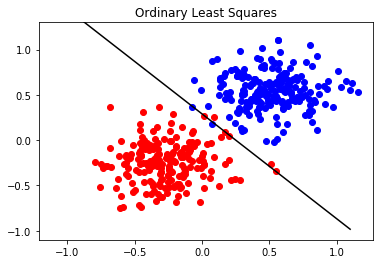

In [10]:
### CALCULATE AND PLOT LINEAR DISCRIMINANT ###
Slope     = -w[1]/w[0]
Intercept = -w[2]/w[0]
Domain    = np.linspace(-1.1, 1.1, 60)  # set up the descision surface domain, -1.1 to 1.1 (looking at the data), do it 60 times
Disc      = Slope*Domain+Intercept

matplotlib.pyplot.figure(4)
matplotlib.pyplot.plot(C1[:NSampsClass, 0], C1[:NSampsClass, 1], 'bo')
matplotlib.pyplot.plot(C2[:NSampsClass, 0], C2[:NSampsClass, 1], 'ro')
matplotlib.pyplot.plot(Domain, Disc, 'k-')
matplotlib.pyplot.ylim([-1.1,1.3])
matplotlib.pyplot.title('Ordinary Least Squares')
matplotlib.pyplot.show()

In [ ]:
RegConst      = 0.1
AllSampsBias  = np.concatenate((AllSamps, np.ones((NSamps,1))), axis=1)
AllSampsBiasT = AllSampsBias.T
XtX           = AllSampsBiasT.dot(AllSampsBias)
AllSampsReg   = XtX + RegConst*np.eye(3)
Pseudo        = linalg.pinv2(AllSampsReg)
wr            = Pseudo.dot(AllSampsBiasT.dot(TargetOutputs))

In [ ]:
Slope     = -wr[1]/wr[0]
Intercept = -wr[2]/wr[0]
Domain    = np.linspace(-1.1, 1.1, 60)
Disc      = Slope*Domain+Intercept

matplotlib.pyplot.figure(5)
matplotlib.pyplot.plot(C1[:NSampsClass, 0], C1[:NSampsClass, 1], 'bo')
matplotlib.pyplot.plot(C2[:NSampsClass, 0], C2[:NSampsClass, 1], 'ro')
matplotlib.pyplot.plot(Domain, Disc, 'k-')
matplotlib.pyplot.ylim([-1.1,1.3])
matplotlib.pyplot.title('Ridge Regression')
matplotlib.pyplot.show()

Save this project with the name: OLSandRidgeRegress2DPGader.  Make a New Project for Spectra.

In [ ]:
### COMPUTE OUTPUTS ON TRAINING DATA ###
yr = AllSampsBias.dot(wr)

### PLOT OUTPUTS FROM TRAINING DATA ###
matplotlib.pyplot.figure(6)
matplotlib.pyplot.plot(range(NSamps), yr, 'm')
matplotlib.pyplot.plot(range(NSamps),np.zeros((NSamps,1)), 'b')
matplotlib.pyplot.plot(range(NSamps), TargetOutputs, 'k')
matplotlib.pyplot.title('TrainingOutputs (Magenta) vs Desired Outputs (Black)')
matplotlib.pyplot.show()

In [ ]:
y1 = y[range(NSampsClass)]
y2 = y[range(NSampsClass, NSamps)]
Corr1 = np.sum([y1>0])
Corr2 = np.sum([y2<0])

y1r = yr[range(NSampsClass)]
y2r = yr[range(NSampsClass, NSamps)]
Corr1r = np.sum([y1r>0])
Corr2r = np.sum([y2r<0])

In [ ]:
print('Result for Ordinary Least Squares')
CorrClassRate=(Corr1+Corr2)/NSamps
print(Corr1 + Corr2, 'Correctly Classified for a ', round(100*CorrClassRate), '% Correct Classification \n')

print('Result for Ridge Regression')
CorrClassRater=(Corr1r+Corr2r)/NSamps
print(Corr1r + Corr2r, 'Correctly Classified for a ', round(100*CorrClassRater), '% Correct Classification \n')

In [ ]:
### Make Confusion Matrices ###
NumClasses = 2;
Cm         = np.zeros((NumClasses,NumClasses))
Cm[(0,0)]  = Corr1/NSampsClass
Cm[(0,1)]  = (NSampsClass-Corr1)/NSampsClass
Cm[(1,0)]  = (NSampsClass-Corr2)/NSampsClass
Cm[(1,1)]  = Corr2/NSampsClass
Cm           = np.round(100*Cm)
print('Confusion Matrix for OLS Regression \n', Cm, '\n')

Cm           = np.zeros((NumClasses,NumClasses))
Cm[(0,0)]    = Corr1r/NSampsClass
Cm[(0,1)]    = (NSampsClass-Corr1r)/NSampsClass
Cm[(1,0)]    = (NSampsClass-Corr2r)/NSampsClass
Cm[(1,1)]    = Corr2r/NSampsClass
Cm           = np.round(100*Cm)
print('Confusion Matrix for Ridge Regression \n', Cm, '\n')

EXERCISE:  Run Ordinary Least Squares and Ridge Regression on Spectra and plot the weights